In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calibration

This notebook will be used for data analysis of the "Muon Lifetime Experiment" laboratory project in Experimental Physics.

### Verifying FPGA Timer Results

This stage of the calibration process involves verifying the FPGA timer reading, by comparing time readings with that of the oscilloscope. We will aim to perform a linear fit, and if the fit is a y=x curve, there is a perfect relationship between the two timers, and our equipment is perfectl calibrated.

### Import datasets
Importing the raw datasets, combining them into one table.

In [2]:
# New data for each of the times
muondf_25 = pd.read_csv('muon2.5.csv', delimiter=',')
muondf_50 = pd.read_csv('muon5.csv', delimiter=',')
muondf_75 = pd.read_csv('muon7.5.csv', delimiter=',')
muondf_100 = pd.read_csv('muon10.csv', delimiter=',')
muondf_125 = pd.read_csv('muon12.5.csv', delimiter=',')
muondf_150 = pd.read_csv('muon15.csv', delimiter=',')
muondf_175 = pd.read_csv('muon17.5.csv', delimiter=',')
muondf_200 = pd.read_csv('muon20.csv', delimiter=',')

# array of all
muon_dfs_all = [muondf_25, muondf_50, muondf_75, muondf_100, muondf_125, muondf_150, muondf_175, muondf_200]

muondf_175.head()

,40000,1666607549
0,40000,1666607550
1,17380,1666607550
2,17400,1666607550
3,17440,1666607550
4,17380,1666607551


In [3]:
muondf = pd.read_csv('muon_data.csv', delimiter=' ')
muondf.head()

,40000,1666611857
0,40000,1666611858
1,560,1666611858
2,260,1666611858
3,560,1666611858
4,900,1666611858


### Clean data

Drop values above 40,000 - attributed to lack of second pulse (since the timer resets) - so no muon lifetime measured in these cases.

In [4]:
# drop values above 40k for lifetime in all:
for i in range(len(muon_dfs_all)):
    muon_dfs_all[i].head()
    muon_dfs_all[i].columns=['Muon Lifetime (ns)', 'Time since beginning (ns)']
    muon_dfs_all[i].drop(muon_dfs_all[i].index[muon_dfs_all[i]['Muon Lifetime (ns)'] >= 40000], inplace=True)

    

Calculate the mean lifetimes for each set of data. (Mean FPGA Timer readings)

In [5]:
# Calculate the mean lifetimes
means =[]
stdevs = []

for i in range(len(muon_dfs_all)):
    this_mean = muon_dfs_all[i]['Muon Lifetime (ns)'].mean()
    means.append(this_mean)
    
    this_stdev = muon_dfs_all[i]['Muon Lifetime (ns)'].std()
    stdevs.append(this_stdev)
    
    
means = np.array(means)
stdevs = np.array(stdevs)
print(means)
print(stdevs)

    
    

[ 2343.45279118  5019.93048314  7453.71169916  9773.24801107
 12439.7587039  14909.7799511  17411.76511226 19974.0848991 ]
[ 7.77579288  7.6243994   9.48028233 13.88286609 13.82939265 11.18676606
 23.16134535 14.94674715]


### Perform a linear fit

Linear fit on the data using NumPy Polyfit function

In [6]:
# Array
arr = np.array([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
x = np.linspace(0,20000,100)

# poly fit, linear
fit, cov = np.polyfit(arr, means, 1, cov=True)

# Y-vals
y = fit[0] * x + fit[1]
#print(fit[0])

# Uncertainties from Covariance Matrix
unc = np.sqrt(np.diag(cov))

# Output
print(f'Fit Equation: y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], -1)}±{round(unc[1], -1)})')







Fit Equation: y = (1.00±0.01)x + (-110.0±60.0)


Above we have our linear fit equation and respective uncertainties. It appears to be close to what we expected, since the gradient is 1 to 2.dp, satisfying the y=x condition. However, the intercept is not zero (within uncertainty), so there may be some slight issues with the FPGA timer calibration. Either way this should be accounted for in our uncertainty.

### Plot the data

Note: error bars too small to see
Error values: [ 7.77579288  7.6243994   9.48028233 13.88286609 13.82939265 11.18676606
 23.16134535 14.94674715]
Fit Equation y = (1.00±0.01)x + (-110.0±60.0)


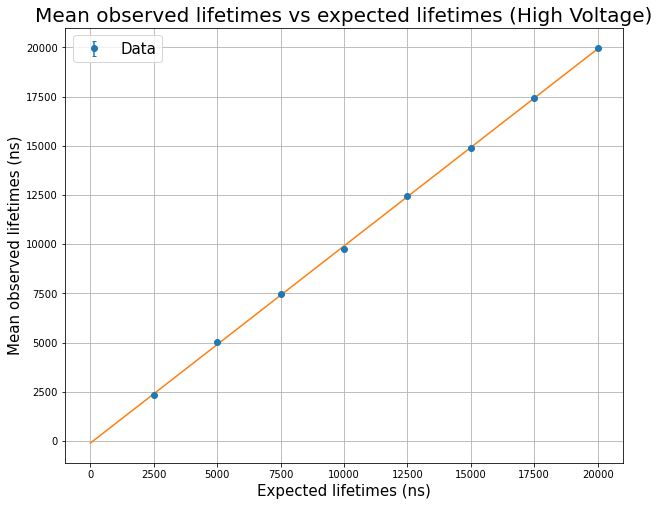

In [7]:
plt.figure(figsize=(10,8))
plt.title('Mean observed lifetimes vs expected lifetimes (High Voltage)', fontsize=20)
plt.errorbar(arr, means, yerr=stdevs, fmt='o', label='Data', capsize=2)
plt.plot(x,y,'-', )
plt.xlabel('Expected lifetimes (ns)', fontsize=15)
plt.ylabel('Mean observed lifetimes (ns)', fontsize=15)
plt.grid()
plt.legend(fontsize=15)

print('Note: error bars too small to see')
print(f'Error values: {stdevs}')
print(f'Fit Equation y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], -1)}±{round(unc[1], -1)})')


Above is a plot of the linear fit, comparing FPGA timer and oscilloscope timer.

In [8]:
muondf.head()

,40000,1666611857
0,40000,1666611858
1,560,1666611858
2,260,1666611858
3,560,1666611858
4,900,1666611858


### Repeat Readings
We repeated readings due to some systematic error and to ensure reliability.
### Import the low voltage datasets

In [9]:
# low voltage data

microsec05 = pd.read_table('0.5 microsec.data', delimiter=' ')
microsec10 = pd.read_table('1 microsec.data', delimiter=' ')
microsec15 = pd.read_table('1.5 microsec.data', delimiter=' ')
microsec20 = pd.read_table('2 microsec.data', delimiter=' ')
microsec25 = pd.read_table('2.5 microsec.data', delimiter=' ')
microsec50 = pd.read_table('5 microsec.data', delimiter=' ')
microsec75 = pd.read_table('7.5 microsec.data', delimiter=' ')
microsec100 = pd.read_table('10 microsec.data', delimiter=' ')
microsec125 = pd.read_table('12.5 microsec.data', delimiter=' ')
microsec150 = pd.read_table('15 microsec.data', delimiter=' ')
microsec175 = pd.read_table('17.5 microsec.data', delimiter=' ')
microsec200 = pd.read_table('20 microsec.data', delimiter=' ')

In [10]:
microsec50.head(100)

,40000,1667218154
0,40000,1667218155
1,4860,1667218155
2,4840,1667218155
3,4840,1667218155
4,4840,1667218155
...,...,...
95,4820,1667218156
96,4820,1667218156
97,40099,1667218156
98,4840,1667218156


Aggretgate the dataframes.

In [11]:
high_dfs = [microsec05, microsec10, microsec15, microsec20, microsec25, microsec50, microsec75, microsec100, microsec125, microsec150, microsec175, microsec200]

### Function for data cleaning

Since we repeatedly need to clean data in the same way, I created a function to save time.

In [12]:
# drop values above 40k for lifetime in all:

def cleandata1(array_of_dfs):
    
    for i in range(len(array_of_dfs)):
        array_of_dfs[i].head()
        array_of_dfs[i] = array_of_dfs[i]
        array_of_dfs[i].columns=['Muon Lifetime (μs)', 'Time since beginning (μs)']
        array_of_dfs[i].drop(array_of_dfs[i].index[array_of_dfs[i]['Muon Lifetime (μs)'] >= 40000], inplace=True)
        array_of_dfs[i]['Time since beginning (μs)'] = array_of_dfs[i]['Time since beginning (μs)'] 
        array_of_dfs[i]['Muon Lifetime (μs)'] = array_of_dfs[i]['Muon Lifetime (μs)'] / 1000
        
        
        
    return array_of_dfs


def cleandata(df):
    df.head()
    df.columns=['Muon Lifetime (μs)', 'Time since beginning (μs)']
    df.drop(df.index[df['Muon Lifetime (μs)'] >= 40000], inplace=True)
    df['Time since beginning (μs)'] = df['Time since beginning (μs)'] 
    df['Muon Lifetime (μs)'] = df['Muon Lifetime (μs)'] / 1000
    
    return df
    

In [13]:
cleandata1(high_dfs)

[      Muon Lifetime (μs)  Time since beginning (μs)
 1                   0.56                 1667217637
 2                   0.58                 1667217637
 3                   0.58                 1667217637
 4                   0.58                 1667217637
 5                   0.58                 1667217637
 ...                  ...                        ...
 2705                0.56                 1667217664
 2706                0.58                 1667217664
 2707                0.58                 1667217664
 2708                0.58                 1667217664
 2709                0.58                 1667217664
 
 [2682 rows x 2 columns],
       Muon Lifetime (μs)  Time since beginning (μs)
 1                   0.98                 1667217862
 2                   0.98                 1667217862
 3                   1.00                 1667217862
 4                   0.98                 1667217862
 5                   0.98                 1667217862
 ...              

### Calculate averages and standard deviation

Calculate the averages and respective standard deviations of the mean (for use as uncertainty in certain cases e.g. when it is the highest available uncertainty)

In [14]:
def averages_and_stuff(array_of_dfs):
    
    means =[]
    stdevs = []

    for i in range(len(array_of_dfs)):
        this_mean = array_of_dfs[i]['Muon Lifetime (μs)'].mean()
        means.append(this_mean)

        this_stdev = array_of_dfs[i]['Muon Lifetime (μs)'].std()
        stdevs.append(this_stdev)


    means = np.array(means)
    stdevs = np.array(stdevs)
    
    return means, stdevs
    

In [15]:
means_high, stdevs_high = averages_and_stuff(high_dfs)
expected = np.array([500, 1000, 1500, 2000, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])/1000

print(means_high, stdevs_high)

[ 0.5735123   0.99266929  1.50396233  1.94930551  2.49933453  4.8353097
  7.36261119  9.92005071 12.68797991 15.17693375 17.32516312 19.9284887 ] [0.00936464 0.00963889 0.00797305 0.00997765 0.04604611 0.00852598
 0.00703139 0.01282537 0.01014126 0.28156207 0.01781248 0.01071007]


### Linear fit

Perform a linear fit on the data sets. Purpose of this is to check if the FPGA timer is working correctly and is calibrated. Expectation is a perfect linear fit, which would show that there is a direct 1-1 (y = x) relationship between the oscilloscope timer readings and the FPGA timer readings.

In [16]:
x = np.linspace(0,20,100)
# poly fit, linear
fit, cov = np.polyfit(expected, means_high, 1, cov=True)
#print(fit)

y = fit[0] * x + fit[1]

print(fit[0])


print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], 2)}±{round(unc[1], 2)})')
unc = np.sqrt(np.diag(cov))


xerror = np.ones(len(expected))*1
yerror = np.ones(len(means_high)) *0.7

root_N = np.sqrt(len(means_high))


0.9994907423339544
y = (1.00±0.01)x + (-0.02±64.31)


Note: error bars too small to see
x-value errors: 0.7 (1 d.p.)
y-value errors: [0.01 0.01 0.01 0.01 0.05 0.01 0.01 0.01 0.01 0.28 0.02 0.01]
y = (1.00±0.01)x + (-0.02±0.06)


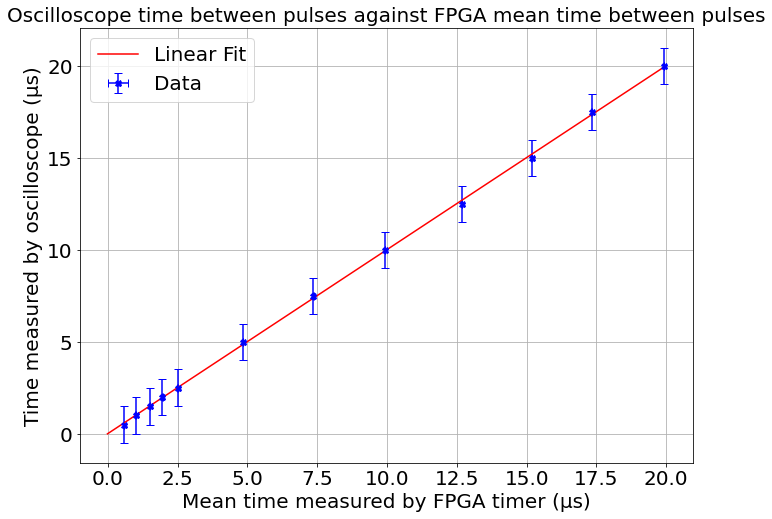

In [17]:
plt.figure(figsize=(11,8))
plt.title('Oscilloscope time between pulses against FPGA mean time between pulses', fontsize=20)
plt.errorbar(y=expected, x=means_high, xerr=0.01,yerr=xerror, fmt='X', label='Data', capsize=4, color='blue')
plt.plot(y,x,'-', label='Linear Fit', color='red')
plt.ylabel('Time measured by oscilloscope (μs)', fontsize=20)
plt.xlabel('Mean time measured by FPGA timer (μs)', fontsize=20)
plt.grid()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)

print('Note: error bars too small to see')
print(f'x-value errors: 0.7 (1 d.p.)')
print(f'y-value errors: {np.round(stdevs_high,2)}')
print(f'y = ({fit[0] :.2f}±{unc[0] :.2f})x + ({round(fit[1], 2)}±{round(unc[1], 2)})')

Error bars from the resolution of the oscilloscope timer, propagated accordingly. There was 1 anomalous error bar for the FPGA timer (standard deviation was skewed by a noisy result) - which has since been removed.

### Chi-Squared values

In [18]:
from scipy.stats import chisquare

# Fit
y_here = fit[0] * means_high + fit[1]
print(stdevs_high)

# Chi squared
Chi_sqr = np.sum((y_here - expected)**2/xerror**2)

# Values
print(Chi_sqr)
print(Chi_sqr/2)

[0.00936464 0.00963889 0.00797305 0.00997765 0.04604611 0.00852598
 0.00703139 0.01282537 0.01014126 0.28156207 0.01781248 0.01071007]
0.17796681630766392
0.08898340815383196


# Muon Data Trial Run

First reading of data

In [19]:
muondf_trial1 = pd.read_table('test trial one.data', delimiter=' ')

In [20]:
muondf_trial1

,40000,1667235506
0,40000,1667235507
1,20,1667235507
2,20,1667235508
3,20,1667235508
4,40562,1667235508
...,...,...
335985,40252,1667293925
335986,40000,1667293926
335987,40000,1667293927
335988,40000,1667293928


In [21]:
cleandata(muondf_trial1)

,Muon Lifetime (μs),Time since beginning (μs)
1,0.02,1667235507
2,0.02,1667235508
3,0.02,1667235508
5,0.02,1667235509
6,0.02,1667235509
...,...,...
335978,0.02,1667293923
335980,0.02,1667293924
335981,0.02,1667293924
335983,0.02,1667293924


In [22]:
no_of_counts = muondf_trial1.groupby(['Muon Lifetime (μs)'], sort=False).size()
print(no_of_counts)

Muon Lifetime (μs)
0.02     274829
0.04       3208
11.32         1
dtype: int64


Looking at the above, there is only 3 discrete lifetime readings, and the counts are heavily skewed. Clearly this data set is flawed - systematic error.

<BarContainer object of 3 artists>

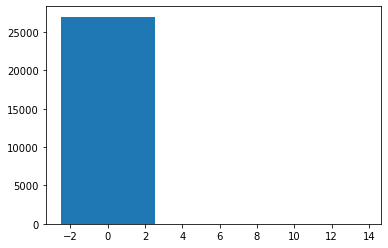

In [23]:
no_of_counts

x = np.array([0.02,0.04,11.32])
y = np.array([27000, 3208, 1])

plt.bar(x, y, width=np.array([5, 5, 5]))

### Plotting Muon Lifetime distribution

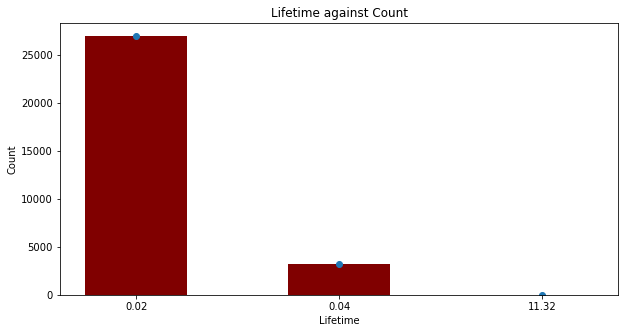

In [24]:
# creating the dataset
data = {'0.02':27000, '0.04':3208, '11.32':1}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.5)
plt.plot(courses, values, 'o')


plt.xlabel("Lifetime")
plt.ylabel("Count")
plt.title("Lifetime against Count")
plt.show()

Above data suggests an error in method - since there are only three bins, indicating full data has not been taken. Repeat readings will be necessary.

### Exponential Decay Fit Eq

Given a new set of data which has been measured properly, we can now perform an exponential decay fit.

Generating the exponential decay curve to fit to our histogram

In [25]:
# Curve fit
from scipy.optimize import curve_fit

# Exponential decay equation
def exp_decay(x, a, b, c):
    y = a*np.exp(-b*x) + c
    return y

### Second Trial Data

A second repeat reading of the data collection process resulted in a better looking and wider range of lifetimes measured. We will plot this in a histogram and fit an exponential decay curve to it - to determine the mean muon lifetime.

#### Import Dataset

In [26]:
#### Second Trial Dataset
muondf_new = pd.read_csv('muonmonday.txt', sep=' ')

#### Clean Data

In [27]:
# Clean data // run once only
data = cleandata(muondf_new)

#### View a sample

In [28]:
# View a data sample
lifetime = data['Muon Lifetime (μs)']
data.head()

,Muon Lifetime (μs),Time since beginning (μs)
24,1.68,1668446849
36,2.92,1668446860
99,0.66,1668446922
134,3.24,1668446957
184,1.08,1668447006


#### Generate values, errors etc.

In [29]:
# Generate some x values, based on our collected x-vals
x = np.arange(0,21,0.1)

# Params + cov matrix
popt, pcov= curve_fit(exp_decay, binscenters, hist)

# Calculate respective y-vals
y2 = popt[0]*np.exp(-popt[1]*x)+popt[2]

#print(popt[0], popt[1], popt[2])
#print(x, y2)

NameError: name 'binscenters' is not defined

#### Plot a histogram and the exp fit

NameError: name 'y2' is not defined

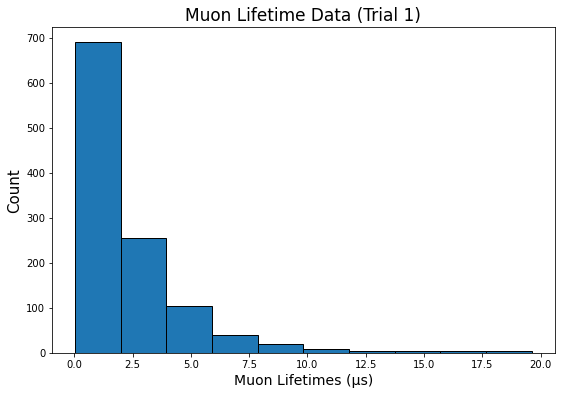

In [30]:
# Plotting the complete histogram and respective exponential decay fit
plt.figure(figsize=(9,6))
plt.title('Muon Lifetime Data (Trial 1)', fontsize=17)
plt.xlabel('Muon Lifetimes (μs)', fontsize=14)
plt.ylabel('Count', fontsize=15)
plt.hist(lifetime, ec='k')
plt.plot(x, y2, label='Exponential Decay Fit')
plt.text(3, 900 , 'y = (1145.0 ± 9.0)*exp(-(0.50 ± 0.01)x + (4.3 ± 1.2))', fontsize=14)
plt.text(3, 830, 'τ = 1.98 ± 0.04', fontsize=14)
plt.legend(fontsize=15)

Not bad.

#### Exponential Decay Fit Equation

In [31]:
print(f'Exponential Fit Equation: {round(popt[0],0) } exp(-{popt[1] :.3f}x) + {popt[2]:.2f}')

NameError: name 'popt' is not defined

#### Calculate Muon Lifetime

In [ ]:
val = 1/popt[1]
a = (1/(popt[1]**2))
b = a*0.01

print(f"Muon Lifetime Measurement: {round(val, 2)} +- {(round(b,2))}")

#### Fit Parameter Uncertainties

In [32]:
# Uncertainties on fit params
pcov

NameError: name 'pcov' is not defined

In [33]:
# Calculate uncertainties using square root of the diagonal of covariance matrix (basically the standard deviation)
pcov1 = np.matrix(pcov)
uncs_raw = np.sqrt(pcov1.diagonal())
uncs = (np.asarray(uncs_raw)).flatten()

# Uncertainties
print(uncs)
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)})x + ({popt[2]:.1f} ± {uncs[2]:.1f}))')

NameError: name 'pcov' is not defined

#### Repeat for the next data reading

In [34]:
# Data
muondf_trial2 = pd.read_table('Muon2.data', delimiter=' ')
muondf_trial2.head()
print(len(muondf_trial2))

57878


In [35]:
# Data
muondf_new.head()

,Muon Lifetime (μs),Time since beginning (μs)
24,1.68,1668446849
36,2.92,1668446860
99,0.66,1668446922
134,3.24,1668446957
184,1.08,1668447006


In [36]:
# Next dataset
data2 = cleandata(muondf_trial2)
lifetime2 = data2['Muon Lifetime (μs)']


print(len(data2))

759


#### Plot a histogram

Bin edges: [ 0.04   2.002  3.964  5.926  7.888  9.85  11.812 13.774 15.736 17.698
 19.66 ]
Histogram bar heights: [451 178  76  28  10   6   2   1   3   4]
Total counts: 759


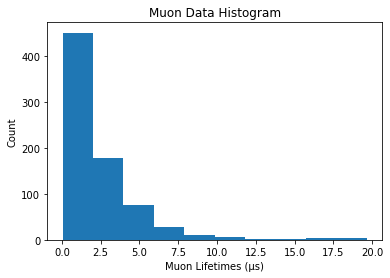

In [37]:
# Generate histogram plot parameters
hist, bins = np.histogram(lifetime2, bins = 10)

# Plot the histogram
plt.figure()
plt.title('Muon Data Histogram')
plt.hist(lifetime2)
plt.xlabel('Muon Lifetimes (μs)')
plt.ylabel('Count')


# centre of each
binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

print(f'Bin edges: {bins}')
print(f'Histogram bar heights: {hist}')
print(f'Total counts: {np.sum(hist)}')

#### Generate Exponential Decay Fit

In [38]:
# Generate some x values, based on our collected x-vals
x = np.arange(0,21,0.1)

# Params + cov matrix
popt, pcov= curve_fit(exp_decay, binscenters, hist)

# Calculate respective y-vals
y2 = popt[0]*np.exp(-popt[1]*x)+popt[2]

print(popt[0], popt[1], popt[2])
print(x, y2)

727.0318851937159 0.4712556884918853 1.4253723086659704
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


#### Plot histogram and curve fit

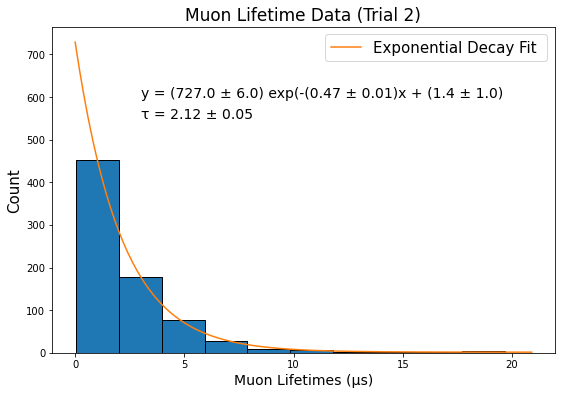

In [39]:
# Plotting the complete histogram and respective exponential decay fit
plt.figure(figsize=(9,6))
plt.title('Muon Lifetime Data (Trial 2)', fontsize=17)
plt.xlabel('Muon Lifetimes (μs)', fontsize=14)
plt.ylabel('Count', fontsize=15)
plt.text(3, 600 , 'y = (727.0 ± 6.0) exp(-(0.47 ± 0.01)x + (1.4 ± 1.0)', fontsize=14)
plt.text(3, 550, 'τ = 2.12 ± 0.05', fontsize=14)
plt.hist(lifetime2, ec='k')
plt.plot(x, y2, label='Exponential Decay Fit ')
plt.legend(fontsize=15)

#### Calculate Uncertainties
Determine the uncertainties on the fit parameters.

In [40]:
# Calculate uncertainties using square root of the diagonal of covariance matrix (basically the standard deviation)
pcov1 = np.matrix(pcov)
uncs_raw = np.sqrt(pcov1.diagonal())
uncs = (np.asarray(uncs_raw)).flatten()

# Uncertainties
print(uncs)
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)})x + ({popt[2]:.1f} ± {uncs[2]:.1f})')

[6.25510666e+00 6.07038796e-03 9.90057403e-01]
Exponential Fit Equation: (727.0 ± 6.0) exp(-(0.47 ± 0.01)x + (1.4 ± 1.0)


In [41]:
val = (1/popt[1])
a = (1/(0.471**2))
b = a*0.01
print(b)
print(f'{val :.2f} ± {b :.2f}' )

0.045077330159889295
2.12 ± 0.05


Good to have more data.

#### Cut-off
Cutting off lifetimes below the reliable range of measurement (as measured before). From before, we measured the bandwidth range to be within 1.1 microseconds to 5.2 microseconds. This range is reliable, so I will try and cut off the measurements outside this range, fit the curve and see what the parameters are.

In [42]:
# set the range u want to include
lower_lim = 5
upper_lim = 21

In [43]:
data2_new = data2[data2['Muon Lifetime (μs)'].between(lower_lim, upper_lim)]
data = data2['Muon Lifetime (μs)']

In [44]:
lifetime2_new = data2_new['Muon Lifetime (μs)']

#### Histograms

Bin edges: [ 5.02        6.35090909  7.68181818  9.01272727 10.34363636 11.67454545
 13.00545455 14.33636364 15.66727273 16.99818182 18.32909091 19.66      ]
Histogram bar heights: [36 19  9  4  4  2  0  1  3  1  3]
Total counts: 82
838.9609882073387 0.5593009781232237 1.4138234166222
[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1
 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5
 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9
 19.

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


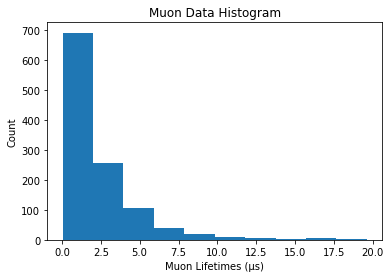

In [45]:
# Generate histogram plot parameters
hist, bins = np.histogram(lifetime2_new, bins = 11)

# Plot the histogram
plt.figure()
plt.title('Muon Data Histogram')
plt.hist(lifetime)
plt.xlabel('Muon Lifetimes (μs)')
plt.ylabel('Count')


# centre of each
binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

print(f'Bin edges: {bins}')
print(f'Histogram bar heights: {hist}')
print(f'Total counts: {np.sum(hist)}')

# Generate some x values, based on our collected x-vals
x = np.arange(lower_lim,upper_lim,0.1)

# Params + cov matrix
popt, pcov= curve_fit(exp_decay, binscenters, hist)

# Calculate respective y-vals
y2 = popt[0]*np.exp(-popt[1]*x)+popt[2]

print(popt[0], popt[1], popt[2])
print(x, y2)

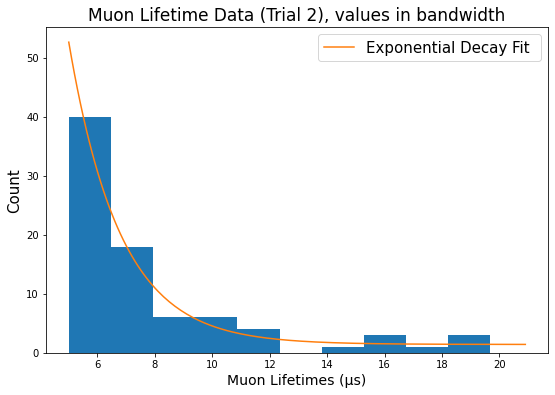

In [46]:
### Plotting the complete histogram and respective exponential decay fit
plt.figure(figsize=(9,6))
plt.title('Muon Lifetime Data (Trial 2), values in bandwidth', fontsize=17)
plt.xlabel('Muon Lifetimes (μs)', fontsize=14)
plt.ylabel('Count', fontsize=15)
plt.hist(lifetime2_new)
plt.plot(x, y2, label='Exponential Decay Fit ')
plt.legend(fontsize=15)

#### Fit Equation

In [47]:
print(f'Exponential Fit Equation: {round(popt[0],3) } exp(-{popt[1] :.4f}x) + {popt[2]:.2f}')
print(1/popt[1])

Exponential Fit Equation: 838.961 exp(-0.5593x) + 1.41
1.7879460954199917


#### Uncertainties

In [48]:
# Calculate uncertainties using square root of the diagonal of covariance matrix (basically the standard deviation)
pcov1 = np.matrix(pcov)
uncs_raw = np.sqrt(pcov1.diagonal())
uncs = (np.asarray(uncs_raw)).flatten()

# Uncertainties
print(uncs)
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)})x + ({popt[2]:.1f} ± {uncs[2]:.1f})')

[2.26435535e+02 4.61722277e-02 5.22265085e-01]
Exponential Fit Equation: (839.0 ± 226.0) exp(-(0.56 ± 0.05)x + (1.4 ± 0.5)


In [49]:
a = (1/(0.50279**2))
b = a*0.01
print(b)  

0.03955730876202724


#### Plot the histogram and fit

82


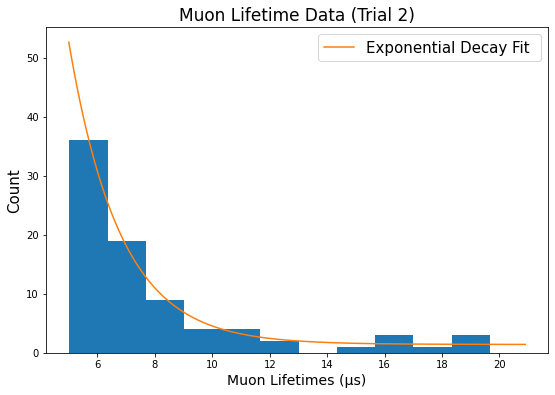

In [50]:
# Plotting the complete histogram and respective exponential decay fit
plt.figure(figsize=(9,6))
plt.title('Muon Lifetime Data (Trial 2)', fontsize=17)
plt.xlabel('Muon Lifetimes (μs)', fontsize=14)
plt.ylabel('Count', fontsize=15)
#plt.text(7, 40 , 'y = (1365 ± 524.0) exp(-(0.62 ± 0.07)x + (1.8 ± 0.7))', fontsize=14)
#plt.text(7, 35, 'τ = 1.61 ± 0.03', fontsize=14)
plt.hist(lifetime2_new, bins=11)
plt.plot(x, y2, label='Exponential Decay Fit ')
plt.legend(fontsize=15)
print(len(lifetime2_new))

## Finding the optimal bin size

Find the optimal bind size. Doing this by iterating through a range of different bin sizes and finding the chi squared of the fit compared to the bin height. Will plot the chi squared values against bin sizes and choose the optimal solution.

In [51]:
chi_squared_vals = []
chi_squared_norm_vals = []
no_of_bins_vals = []

for i in range(5,250):
    no_of_bins = i
    hist, bins = np.histogram(lifetime2_new, bins = no_of_bins)
    
    # centre of each
    binscenters = np.array([0.5 * (bins[j] + bins[j + 1]) for j in range (len(bins)-1)])

    # Generate some x values, based on our collected x-vals
    x2 = np.linspace(0,21, len(hist))

    # Params + cov matrix
    popt, pcov= curve_fit(exp_decay, binscenters, hist)


    # Calculate respective y-vals
    y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
    
    #chi_squared = np.random.chisquare(hist,y2)
    chi_squared = np.sum((((hist - y2)**2)/y2))/ (len(y2)-3)
    chi_squared_norm = np.sum((((hist - y2)**2)/y2))
    
    
    no_of_bins_vals.append(no_of_bins)
    chi_squared_vals.append(chi_squared)
    
    chi_squared_norm_vals.append(chi_squared_norm)
    
    
#print(no_of_bins_vals)
#print(chi_squared_vals)
    #print(hist)
print(len(lifetime2_new))


C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


82


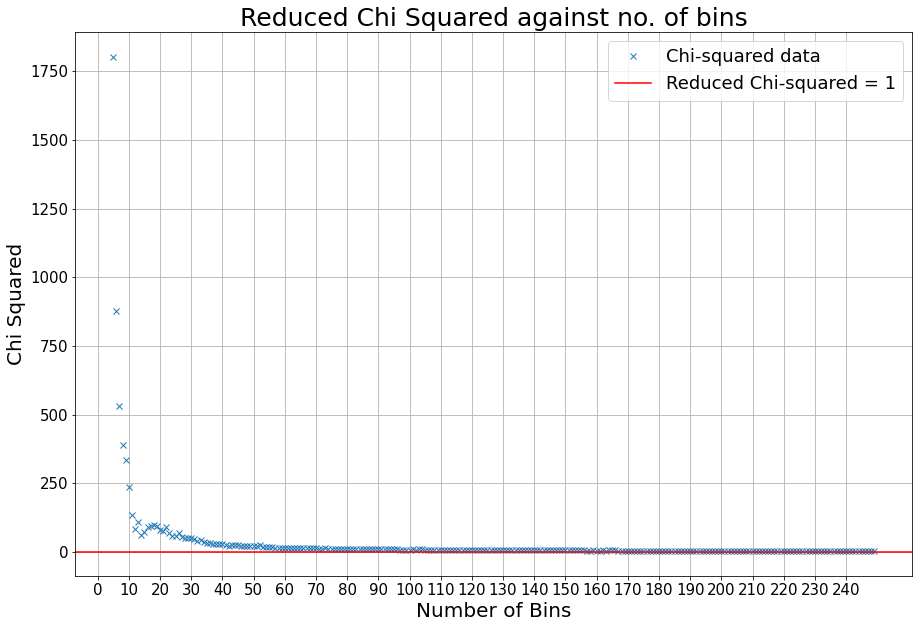

In [52]:
plt.figure(figsize=(15,10))
plt.title('Reduced Chi Squared against no. of bins', fontsize=25)
plt.plot(no_of_bins_vals, chi_squared_vals, 'x', label='Chi-squared data')
plt.xlabel('Number of Bins', fontsize=20)
plt.ylabel('Chi Squared', fontsize=20)
plt.axhline(y = 1, color = 'r', linestyle = '-', label='Reduced Chi-squared = 1')
plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 10), fontsize=15)
plt.yticks(fontsize=15)
#plt.yticks(np.arange(0, max(chi_squared_vals), 50), fontsize=16)
plt.grid()
plt.legend(fontsize=18)

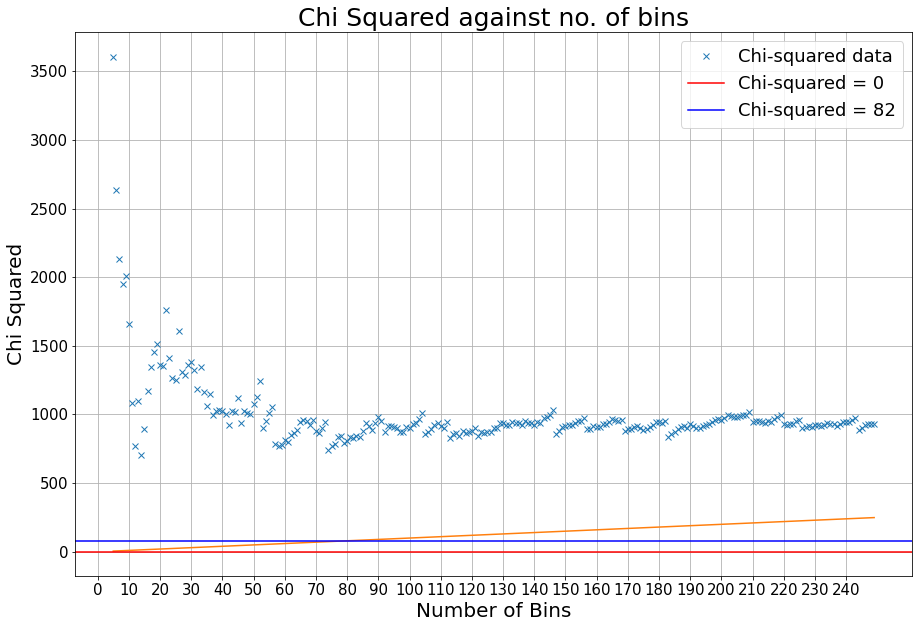

In [53]:
plt.figure(figsize=(15,10))
plt.title('Chi Squared against no. of bins', fontsize=25)
plt.plot(no_of_bins_vals, chi_squared_norm_vals, 'x', label='Chi-squared data')
plt.xlabel('Number of Bins', fontsize=20)
plt.ylabel('Chi Squared', fontsize=20)
plt.plot(no_of_bins_vals, no_of_bins_vals)
plt.axhline(y = 0, color = 'r', linestyle = '-', label='Chi-squared = 0')
plt.axhline(y = np.sum(hist), color = 'b', linestyle = '-', label=f'Chi-squared = {np.sum(hist)}')
plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 10), fontsize=15)
plt.yticks(fontsize=15)
#plt.yticks(np.arange(0, max(chi_squared_vals), 50), fontsize=16)
plt.grid()
plt.legend(fontsize=18)


#### Chi Squared Trend
In the plot above, we can see the trend of the chi-squared, which quickly falls off into overfitting territory after a bin size of 10

#### Visualising
Below, we will visualise some of the plots with varying bin sizes, to try and identify overfitting.

In [54]:
def best_binsizes(start_binsize, stop_binsize, data):
    chi_squared_vals = []
    rchi_squared_vals = []
    no_of_bins_vals = []
    dof_vals = []
    


    for i in range(start_binsize,stop_binsize):
        no_of_bins = i
        cutoff = 0
        
        #hist, bins = np.histogram(data, bins = no_of_bins)
        hist, bins = np.histogram(data, bins = no_of_bins )

        

        # centre of each
        binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

        # Generate some x values, based on our collected x-vals
        x2 = np.linspace(0,19.8, 100)

        # Params + cov matrix
        popt, pcov= curve_fit(exp_decay, binscenters, hist)


        # Calculate respective y-vals
        y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
        # Expected
        y22 = popt[0]*np.exp(-popt[1]*binscenters)+popt[2]

        chi_squared = np.sum(((hist - y22)**2)/y22)
        
        
        dof = no_of_bins - 3
        #rchi_squared = np.sum(((hist - y22)**2)/dof)
        rchi_squared = chi_squared/dof
        print(dof)
        dof_vals.append(dof)
        no_of_bins_vals.append(i)
        chi_squared_vals.append(chi_squared)
        rchi_squared_vals.append(rchi_squared)
        
        #plt.figure()
       # plt.title(f'Muon Lifetime Data, No. of bins: {no_of_bins}', fontsize=17)
       # plt.xlabel('Time between pulses (μs)', fontsize=20)
       # plt.ylabel('Count', fontsize=20)
       # plt.xticks(fontsize=15)
       # plt.yticks(fontsize=15)
        #plt.text(7, 40 , 'y = (1365 ± 524.0) exp(-(0.62 ± 0.07)x + (1.8 ± 0.7))', fontsize=14)
        #plt.text(7, 35, 'τ = 1.61 ± 0.03', fontsize=14)
       # plt.text(7, 30, )
      #  plt.hist(data, bins=no_of_bins, edgecolor='black')
        #plt.text(10,600, f'Fit Eq.: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
      #  plt.plot(x2, y2, label='Fit Curve', color='r')
      #  plt.errorbar(binscenters, hist, yerr=np.sqrt(hist), fmt='o', ecolor="red", color="red", elinewidth=1, capsize=3, label='Expected Data')

        #print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
        print(1/popt[1])
        
       # plt.legend(fontsize=20)
        
        
        
        
    plt.figure()
    plt.title('$\chi^{2}$ against no. of bins', fontsize=20)
    plt.plot(no_of_bins_vals, chi_squared_vals, 'x', label='$\chi^{2}$ data')
    plt.xlabel('Number of Bins', fontsize=20)
    plt.ylabel('$\chi^{2}$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.axhline(y = 1, color = 'r', linestyle = '-', label='$\chi^{2}$ = 0')
    plt.plot(no_of_bins_vals, dof_vals,'.', color='r', label='$\chi^{2}$ = Degrees of freedom')
    #plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 10))
    #plt.yticks(np.arange(0, max(chi_squared_vals), 1))
    plt.grid()
    plt.legend(fontsize=13)
    
    plt.figure()
    plt.title('${\chi_{v}}^{2}$ against no. of bins', fontsize=20)
    plt.plot(no_of_bins_vals, rchi_squared_vals, 'x', label='${\chi_{v}}^{2}$ data')
    plt.xlabel('Number of Bins', fontsize=20)
    plt.ylabel('${\chi_{v}}^{2}$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axhline(y = 1, color = 'r', linestyle = '-', label='${\chi_{v}}^{2}$ = 1')
    #plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 10))
    #plt.yticks(np.arange(0, max(chi_squared_vals), 1))
    plt.grid()
    plt.legend(fontsize=15)
        
    dof_vals1 = np.array(dof_vals)
    no_of_bins_vals1 = np.array(no_of_bins_vals)
    chi_squared_vals1 = np.array(chi_squared_vals)
    rchi_squared_vals1 = np.array(rchi_squared_vals)

    
        
        
    return(no_of_bins_vals1, chi_squared_vals1, rchi_squared_vals1, dof_vals1)

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  


1
2.0551633091930257
2
2.143552232607452
3
2.062378008576807
4
2.0344120843082596
5
2.0770126364022246
6
2.1072461426735467
7
2.121990300425242
8
2.1422381303126756
9
2.148284812715175
10
2.077279751744156
11
2.068956764756344
12
2.0870298950446395
13
2.080584515219775
14
2.142906646331926
15
2.0907514355239996
16
2.090318441555796
17
2.0620741375626275
18
2.07804429330567
19
2.0381161775942487
20
2.0327792553764388
21
2.099106156297472
22
2.0546190826747712
23
2.0506019770908606
24
2.051332634357421
25
2.0283888269572596
26
2.097276738406745
27
2.070986713537167
28
2.0696562376536756
29
2.059482663915238
30
2.0476973117795687
31
2.090071584353237
32
2.032656652664634
33
2.020794243707706
34
2.047202948415581
35
2.0646338952076313
36
2.029916685117808
37
2.027921927067188
38
2.0512729683438935
39
2.006784616855468
40
2.0182967094136623
41
1.988770046491352
42
2.0096578291178337
43
2.006085357724759
44
2.024945220103542
45
2.0170620762905953
46
1.9804408625546228
47
2.0172068386054987
4

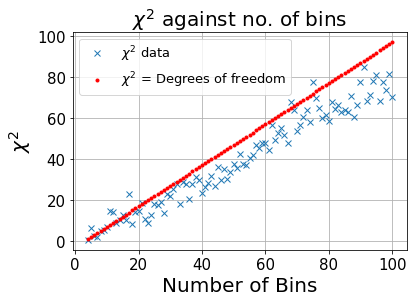

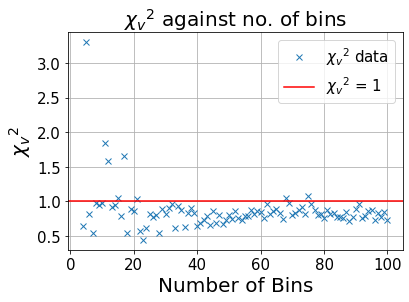

In [55]:
no_of_bins, chi_squareds, rchi_squareds, dof_vals = best_binsizes(4, 101, data)

In [61]:
data3_new = data2[data2['Muon Lifetime (μs)'].between(5, 20)]
data43 = data2['Muon Lifetime (μs)']

Seems like the bin size of 10 shows a difference from optimal chi squared (1) of 0.68.

So, when taking the bin size of 10-11, lets try find where the best time (microsec) to start cutting is. We cut since we need to account for the bandwidth we measured earlier, and that the measurements outside the bandwidth is probably not been reliably measured since the gain is not constant.

In [62]:
no_of_bins = np.ceil(np.log2(len(data43))+1)
print(no_of_bins)


11.0


### Best cut-off
Below, we will try to find the best cut-off point.

In [63]:
        new_hist = []
        for h in hist:
            if h < 5:
                new_h = 0
                new_hist.append(new_h)
                
            else:
                new_hist.append(h)
                
                
        new_hist = [h for h in new_hist if h != 0]
        hist = new_hist
        
        no_of_bins = len(hist)
    
    
        print(hist)

[5]


In [64]:
import matplotlib.pyplot as plt
import pandas as pd

lowerlim = 0
upperlim = 20

# Assume that a Pandas dataframe df with a column 'column_name' exists
df = data2[data2['Muon Lifetime (μs)'].between(lowerlim, upperlim)]

# Get the data from the column
data = df['Muon Lifetime (μs)']

# Calculate the histogram bin counts and bin edges
counts, bin_edges = np.histogram(data)

# Remove bins with counts less than 5
counts = counts[counts >= 5]
bin_edges = bin_edges[:-1][counts >= 5]

# Create a figure and axis object
fig, ax = plt.subplots()

# Use the bar function to plot the histogram
ax.bar(bin_edges, counts, width=bin_edges[1] - bin_edges[0])

# Add a title and labels
ax.set_title('Histogram')
ax.set_xlabel('Value')
ax.set_ylabel('Count')

# Show the plot
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 6

In [65]:
def histogram_plot(lowerlim, data, hist, binscenters, no_of_bins, x, y):
    
        plt.figure()
        plt.title(f'Muon Lifetime Data, Cut-off: {lowerlim} μs', fontsize=20)
        plt.xlabel('Time between pulses (μs)', fontsize=20)
        plt.ylabel('Count', fontsize=20)
        #plt.text(7, 40 , 'y = (1365 ± 524.0) exp(-(0.62 ± 0.07)x + (1.8 ± 0.7))', fontsize=14)
        #plt.text(7, 35, 'τ = 1.61 ± 0.03', fontsize=14)
        #plt.text(7, 30, )
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.errorbar(binscenters, hist, yerr=np.sqrt(hist), fmt='o', ecolor="red", color="red", elinewidth=1, capsize=3, label='Expected Data')

        plt.hist(data, bins=no_of_bins, edgecolor='black')

        plt.plot(x, y, label='Fit Curve', color='r')
        #print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
        #print(1/popt[1])
        plt.legend(fontsize=15)

        return lowerlim
    
def histogram_params_fit(data, lowerlim):

        # Calculate the optimal number of bins using Scott's rule
       # no_of_bins = int(np.ceil((max(data) - min(data)) / (3.5 * std / len(data) ** (1/3))))
        
        no_of_bins = int(np.ceil(np.log2(len(data))+1))
        
        hist, bins = np.histogram(data, bins = no_of_bins)
        
        # Get the histogram data and bin edges
       # hist, edges = np.histogram(data, bins=no_of_bins)
    
   

    
            
        # centre of each
        binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

        # Generate some x values, based on our collected x-vals
        x2 = np.linspace(lowerlim,19.7, 100)

        # Params + cov matrix
        popt, pcov= curve_fit(exp_decay, binscenters, hist, maxfev=5000)


        # Calculate respective y-vals
        #y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
        
        y22 = popt[0]*np.exp(-popt[1]*binscenters)+popt[2]

        dof = len(binscenters) - 3
        chi_squared = np.sum(((hist - y22)**2)/y22)
        #rchi_squared = np.sum((np.square(hist - y22))) / (y22*(len(hist) - 3))
        rchi_squared = chi_squared/dof
        #chi_squared = sum(np.square(hist - y2))/(len(y2)-3)
        
        return no_of_bins, hist, bins, binscenters, x2, y2, dof, chi_squared, rchi_squared
    
    
def chi_squared_plot(lowerlims_vals, chi_squared_vals, dof_vals):
    
        plt.figure()
        plt.title('$\chi^{2}$ against cut-off time', fontsize=20)
        plt.plot(lowerlims_vals, chi_squared_vals, 'x', label='$\chi^{2}$ data')
        plt.plot(lowerlims_vals, dof_vals, 'x', label='$\chi^{2}$ = Degrees of freedom', color='r')
        plt.xlabel('Cut-off time (µs)', fontsize=20)
        plt.ylabel('$\chi^{2}$', fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        #plt.axhline(y = 1, color = 'r', linestyle = '-', label='$\chi^{2}$ = 0')
       # plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 1))
        #plt.yticks(np.arange(0, max(chi_squared_vals), 1))
        plt.grid()
        plt.legend(fontsize=12)

        return print('ok')
    
def rchi_squared_plot(lowerlims_vals, rchi_squared_vals):
    plt.figure()
    plt.title('${\chi_{v}}^{2}$ against cut-off time', fontsize=20)
    plt.plot(lowerlims_vals, rchi_squared_vals, 'x', label='${\chi_{v}}^{2}$ data')
    plt.xlabel('Cut-off time (µs)', fontsize=20)
    plt.ylabel('${\chi_{v}}^{2}$', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.axhline(y = 1, color = 'r', linestyle = '-', label='${\chi_{v}}^{2}$ = 1')
    #plt.xticks(np.arange(0, len(no_of_bins_vals)+1, 1))
    #plt.yticks(np.arange(0, max(chi_squared_vals), 1))
    plt.grid()
    plt.legend(fontsize=15)


In [66]:
# lets make a func to do that, best_cutoff(0,21,data2)

def best_cutoff(lowerlims, upperlim, data2):
    ''' Try a range of different cut off limits to find the best point '''
    
    lowerlims_vals = []
    chi_squared_vals = []
    rchi_squared_vals = []
    no_of_points_vals = []
    dof_vals = []
    no_of_bins_vals=[]
    
    for lowerlim in range(lowerlims):
    
        # Get our range of data
        data1 = data2[data2['Muon Lifetime (μs)'].between(lowerlim, upperlim)]
        data = data1['Muon Lifetime (μs)']
        
        std = np.std(data)
    
        # Calculate the optimal number of bins using Scott's rule
       # no_of_bins = int(np.ceil((max(data) - min(data)) / (3.5 * std / len(data) ** (1/3))))
        
        no_of_bins = int(np.ceil(np.log2(len(data))+1))
        
        hist, bins = np.histogram(data, bins = no_of_bins)
    
    
        new_hist = []
        for h in hist:
            if h < 5:
                new_h = 0
                new_hist.append(new_h)
                
            else:
                new_hist.append(h)
                
                
        #new_hist = [h for h in new_hist if h != 0]
        hist = new_hist
        
        no_of_bins = len(hist)
    
    
        print(hist)
            
        # centre of each
        binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

        # Generate some x values, based on our collected x-vals
        x2 = np.linspace(lowerlim,upperlim, 100)

        # Params + cov matrix
        popt, pcov= curve_fit(exp_decay, binscenters, hist, maxfev=50000)


        # Calculate respective y-vals
        y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
        
        y22 = popt[0]*np.exp(-popt[1]*binscenters)+popt[2]

        dof = len(binscenters) - 3
        chi_squared = np.sum(((hist - y22)**2)/y22)
        #rchi_squared = np.sum((np.square(hist - y22))) / (y22*(len(hist) - 3))
        rchi_squared = chi_squared/dof
        #chi_squared = sum(np.square(hist - y2))/(len(y2)-3)
        
        
        
        no_of_points = len(hist)
        dof_vals.append(dof)
        lowerlims_vals.append(lowerlim)
        chi_squared_vals.append(chi_squared)
        rchi_squared_vals.append(rchi_squared)
        no_of_points_vals.append(no_of_points)
        no_of_bins_vals.append(no_of_bins)
        

        
        histogram_plot(lowerlim, data, hist, binscenters, no_of_bins, x2, y2)
        print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
        print(1/popt[1])
            
        
        
    chi_squared_plot(lowerlims_vals, chi_squared_vals, dof_vals)
    rchi_squared_plot(lowerlims_vals, rchi_squared_vals)
    

        
    lowerlims_f = np.array(lowerlims_vals)
    chi_squared_f = np.array(chi_squared_vals)
    rchi_squared_f = np.array(rchi_squared_vals)
    dof_f = np.array(dof_vals)
    no_of_bins_f = np.array(no_of_bins_vals)
    

    
    return lowerlims_f, chi_squared_f, rchi_squared_f, dof_f, no_of_bins_f, no_of_points_vals
        



[424, 191, 76, 35, 13, 7, 5, 0, 0, 0, 0]
Exponential Fit Equation: (655.0 ± 70.0) exp(-(0.46 ± 0.03))x + (-0.6 ± 1.1)
2.1625990837913536
[289, 105, 52, 19, 7, 6, 0, 0, 0, 0]
Exponential Fit Equation: (767.0 ± 70.0) exp(-(0.51 ± 0.03))x + (1.1 ± 1.1)
1.9633008136665187
[174, 75, 30, 13, 6, 0, 0, 0, 0, 0]
Exponential Fit Equation: (701.0 ± 70.0) exp(-(0.48 ± 0.03))x + (-0.7 ± 1.1)

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  



2.0771007095599834
[102, 47, 17, 8, 5, 0, 0, 0, 0]
Exponential Fit Equation: (581.0 ± 70.0) exp(-(0.44 ± 0.03))x + (-0.6 ± 1.1)
2.270375455964991
[73, 28, 11, 6, 0, 0, 0, 0, 0]
Exponential Fit Equation: (1002.0 ± 70.0) exp(-(0.54 ± 0.03))x + (-0.3 ± 1.1)
1.8606612052194798
[46, 16, 7, 5, 0, 0, 0, 0]
Exponential Fit Equation: (1129.0 ± 70.0) exp(-(0.54 ± 0.03))x + (0.2 ± 1.1)
1.8491438430080025
[30, 8, 7, 0, 0, 0, 0]
Exponential Fit Equation: (1619.0 ± 70.0) exp(-(0.57 ± 0.03))x + (0.1 ± 1.1)
1.7618694922501166
[15, 7, 5, 0, 0, 0, 0]
Exponential Fit Equation: (280.0 ± 70.0) exp(-(0.36 ± 0.03))x + (-0.8 ± 1.1)
2.754086945299083
ok


C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


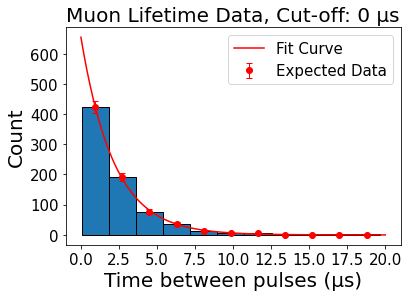

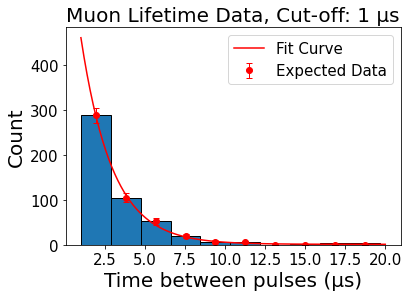

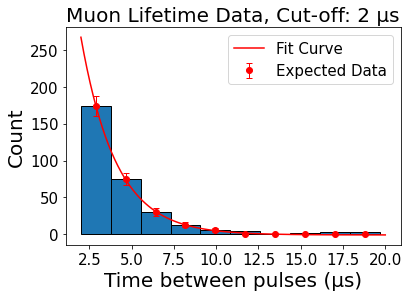

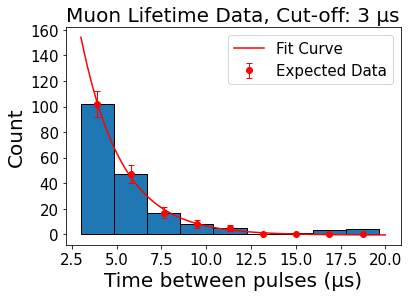

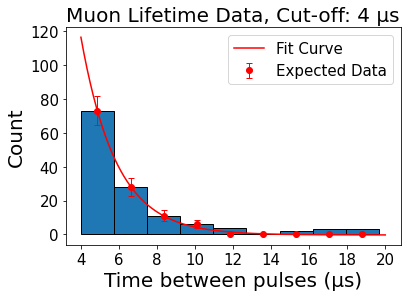

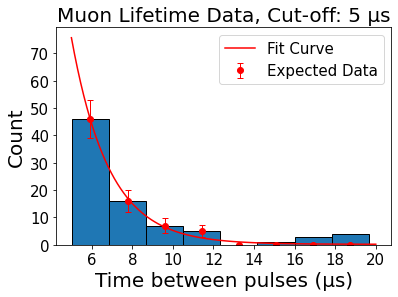

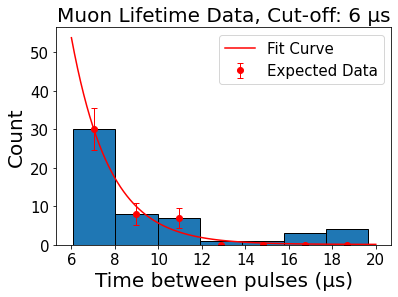

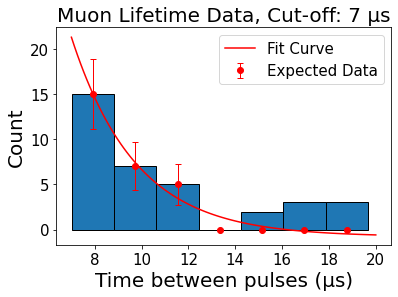

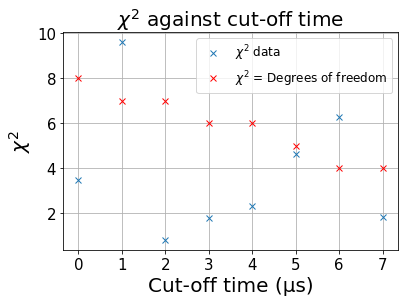

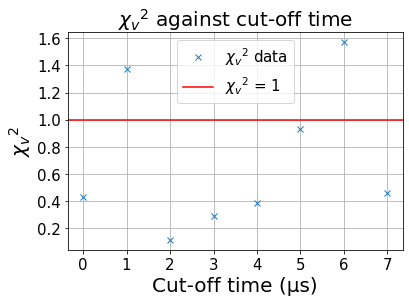

In [100]:
lowerlims, chisquareds2, rchisquareds2, dofs2, no_of_bins2, no_of_points_vals = best_cutoff(8, 20, data2)
#print(no_of_bins2)

#plt.figure()
#plt.title('Time before which we cut off vs chi-squared')
#plt.plot(lowerlims, chisquareds2, '.')

#plt.figure()
#plt.title('Time before which we cut off vs reduced chi-squared')
#plt.plot(lowerlims, rchisquareds2, '.')

#print(chisquareds2)
#print('note: bin sizes have been changed according to sturges rule, as the number of data points have changed')

In [68]:
import numpy as np
from scipy.optimize import curve_fit

def exp_decay(x, a, b, c):
    """ Exponential decay curve """
    return a*np.exp(-b*x) + c

def best_bins_and_cutoff(data, lowerlims, upperlim, start_binsize, stop_binsize):
    """
    Vary both the number of bins and cut-off time and outputs the chi-squared value,
    number of bins, and cut-off time
    """
    chi_squared_vals = []
    rchi_squared_vals = []
    no_of_bins_vals = []
    lowerlims_vals = []

    for lowerlim in range(lowerlims, upperlim+1):
        data1 = data[data['Muon Lifetime (μs)'].between(lowerlim, upperlim)]
        data_cutoff = data1['Muon Lifetime (μs)']
        
        for i in range(start_binsize, stop_binsize):
            no_of_bins = i
            hist, bins = np.histogram(data_cutoff, bins=no_of_bins)

            # Calculate bin centers
            binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins)-1)])

            # Generate x values
            x2 = np.linspace(lowerlim, upperlim, 100)

            # Fit curve
            popt, pcov = curve_fit(exp_decay, binscenters, hist, maxfev=1000000)

            # Calculate y values for fit curve
            y2 = exp_decay(x2, *popt)
            y22 = exp_decay(binscenters, *popt)

            # Calculate chi-squared value
            chi_squared = np.sum(((hist - y22)**2)/y22)
            
            # Calculate reduced chi-squared value
            rchi_squared = np.sum(((hist - y22)**2)/(len(binscenters)-3-1))

            no_of_bins_vals.append(i)
            lowerlims_vals.append(lowerlim)
            chi_squared_vals.append(chi_squared)
            rchi_squared_vals.append(rchi_squared)
            
    return np.array(chi_squared_vals), np.array(no_of_bins_vals), np.array(lowerlims_vals), np.array(rchi_squared_vals)

chisqr_test, bins_test, lowerlims_test, rchisqr_test = best_bins_and_cutoff(data2, 0, 9, 5, 200)

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


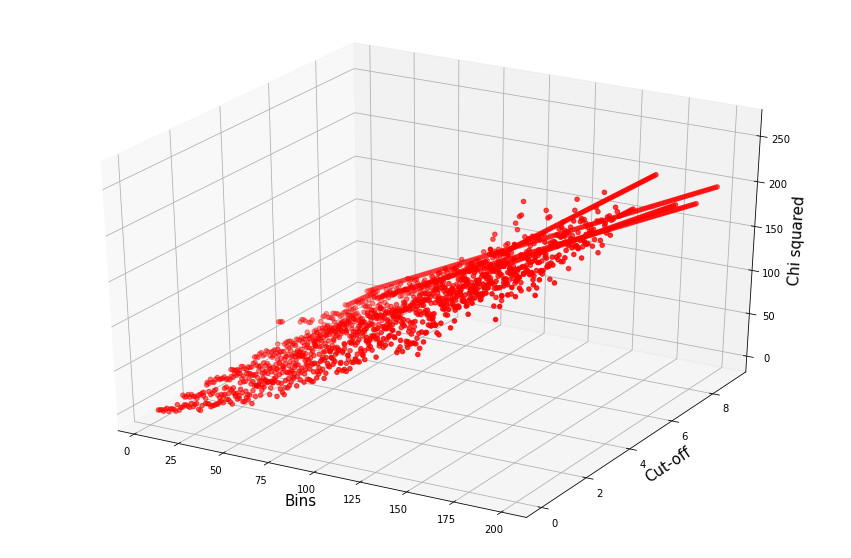

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and 3D axes
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Define the three varying parameters
x = bins_test
y = lowerlims_test
z = chisqr_test

# Plot the 3D graph
ax.scatter(x, y, z, color='red')
# Set the x, y, and z labels
ax.set_xlabel('Bins', fontsize=15)
ax.set_ylabel('Cut-off', fontsize=15)
ax.set_zlabel('Chi squared', fontsize=15)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Set up the figure and 3D axes
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

# Define the three varying parameters
x = bins_test
y = lowerlims_test
z = chisqr_test

# Plot the 3D scatter plot
ax.scatter(x, y, z)

# Plot the surface using the plot_trisurf function
ax.plot_trisurf(x, y, z, alpha=0.5)


# Set the x, y, and z labels
ax.set_xlabel('Bins', fontsize=15)
ax.set_ylabel('Cut-off', fontsize=15)
ax.set_zlabel('Chi squared', fontsize=15)

# Show the plot
plt.show()


#### Best cut-off time
Above we have visualised the chi-squared with cut off times. It appears that the region 5 to 15 has a generally decent chi-squared (not significant overfitting in most cases). 

### Noise / Background Reduction

From the lab script:
- The background estimation is a multi-step process
- Starting with the raw distribution of decay times 
- Fit the distribution with an exponential to produce a tentative lifetime $\tau'$
- Fit the part of the raw distribution that has times greater than $5\tau'$ with a straight line of slope zero
- Use the resulting number as the first estimate of the background
- Subtract this constant number from all bins of the original histogram to produce a new distribution of decay times
- Fit this new distribution to produce a tentative lifetime $\tau''$
- Fit the part of this new distribution that has times greater than $5\tau''$
- Subtract the tentative background level from the previous distribution to produce a new distribution
- Repeat the process for a total of 3 background subtraction steps

In [70]:
data5 = data2[data2['Muon Lifetime (μs)'].between(3, 25)]
data_use = data5['Muon Lifetime (μs)']


Exponential Fit Equation: (627.0 ± 226.0) exp(-(0.46 ± 0.05))x + (1.2 ± 0.5)
Cut off at 3 microsec


C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


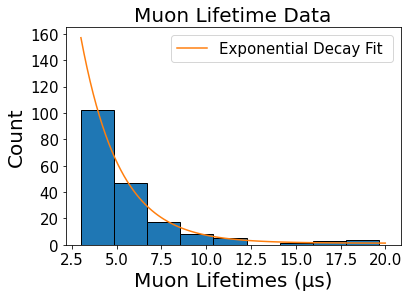

In [71]:
no_of_bins = int(np.ceil(np.log2(len(data_use))+1))
hist, bins = np.histogram(data_use, bins = no_of_bins)

# centre of each
binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

# Generate some x values, based on our collected x-vals
x2 = np.linspace(3, 20, 100)

# Params + cov matrix
popt, pcov= curve_fit(exp_decay, binscenters, hist, maxfev=5000)

# Calculate respective y-vals
y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
y22 = popt[0]*np.exp(-popt[1]*binscenters)+popt[2]

chi_squared = np.sum((np.square(hist - y22))/y22)

plt.figure()
plt.title(f'Muon Lifetime Data', fontsize=20)
plt.xlabel('Muon Lifetimes (μs)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(data_use, bins=no_of_bins, edgecolor='black')
plt.plot(x2, y2, label='Exponential Decay Fit ')
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
print('Cut off at 3 microsec')
plt.legend(fontsize=15)

In [72]:
import scipy
# chi square test
dof = no_of_bins - 1 - 1

prob1 = scipy.stats.chi2.cdf(chi_squared,dof)
print(prob1)
print(1-prob1)


0.8370241049394904
0.16297589506050958


In [73]:
# tentative lifetime:
# Calculate uncertainties using square root of the diagonal of covariance matrix (basically the standard deviation)
pcov1 = np.matrix(pcov)
uncs_raw = np.sqrt(pcov1.diagonal())
uncs = (np.asarray(uncs_raw)).flatten()
lifetime = 1/popt[1]

print()

# Uncertainties
#print(uncs)
print(f'Lifetime: {round(1/popt[1],5)} +- {round(uncs[1]*(1/popt[1]**2), 2)} ')
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)})x + ({popt[2]:.1f} ± {uncs[2]:.1f})')


Lifetime: 2.1554 +- 0.13 
Exponential Fit Equation: (627.0 ± 70.0) exp(-(0.46 ± 0.03)x + (1.2 ± 1.1)


10.776987042158485
Exponential Fit Equation: (627.0 ± 70.0) exp(-(0.46 ± 0.03))x + (1.2 ± 1.1)
Cut off at 4 microsec


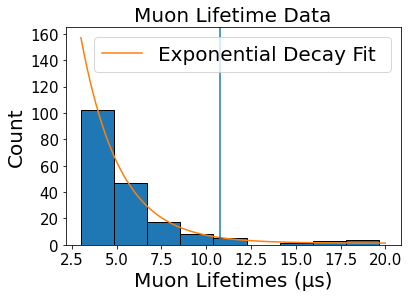

In [74]:
# Fit the part of the raw distribution that has times greater than 5𝜏′ with a straight line of slope zero

time5x = lifetime * 5
print(time5x)

plt.figure()
plt.title(f'Muon Lifetime Data', fontsize=20)
plt.xlabel('Muon Lifetimes (μs)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(data_use, bins=no_of_bins, edgecolor='black')
plt.plot(x2, y2, label='Exponential Decay Fit ')
plt.axvline(x=time5x)
print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
print('Cut off at 4 microsec')
plt.legend(fontsize=20)

Exponential Fit Equation: (251.0 ± 70.0) exp(-(294.63 ± 0.03))x + (20.8 ± 1.1)
Cut off at 4 microsec


C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


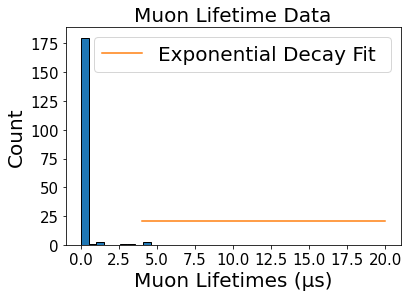

In [75]:
abovetime = data_use[data_use.between(time5x, 25)]
meanbg = abovetime.mean()

data_new = data_use - meanbg
data_new[data_new < 0] = 0

no_of_bins = int(np.ceil(np.log2(len(data_new))+1))
hist, bins = np.histogram(data_new, bins = no_of_bins)

# centre of each
binscenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range (len(bins)-1)])

# Generate some x values, based on our collected x-vals
x2 = np.linspace(4, 20, 100)

# Params + cov matrix
popt, pcov= curve_fit(exp_decay, binscenters, hist, maxfev=5000)

# Calculate respective y-vals
y2 = popt[0]*np.exp(-popt[1]*x2)+popt[2]
y22 = popt[0]*np.exp(-popt[1]*binscenters)+popt[2]

plt.figure()
plt.title(f'Muon Lifetime Data', fontsize=20)
plt.xlabel('Muon Lifetimes (μs)', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(data_new, bins=no_of_bins, edgecolor='black')
plt.plot(x2, y2, label='Exponential Decay Fit ')

print(f'Exponential Fit Equation: ({round(popt[0],0) } ± {round(uncs[0], 0)}) exp(-({popt[1] :.2f} ± {round(uncs[1], 2)}))x + ({popt[2]:.1f} ± {uncs[2]:.1f})')
print('Cut off at 4 microsec')
plt.legend(fontsize=20)

### Decay Simulation (Monte-Carlo)

C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp
C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply


Fit equation: y = 55.83 * exp(-0.20 * x)


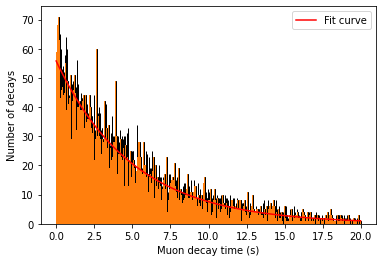

In [76]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants for muon decay
DECAY_RATE = 0.2 # Muon decay rate in inverse seconds
MAX_TIME = 0 # Maximum time to simulate
NUM_SIMULATIONS = 14000 # Number of simulations to run

# Function to simulate a single muon decay
def simulate_decay():
  time = 0
  while True:
    time += random.expovariate(DECAY_RATE)
    if time > MAX_TIME:
      break
  return time

# Run the simulations and store the results in a list
decay_times = []
for i in range(NUM_SIMULATIONS):
  decay_times.append(simulate_decay())

# Create an array of bin edges using numpy
bin_edges = np.arange(0, 20, 0.02)

# Plot the results as a histogram
plt.hist(decay_times, bins=bin_edges, ec='k')
plt.xlabel('Muon decay time (s)')
plt.ylabel('Number of decays')

# Define the exponential decay function
def exponential_decay(t, rate, offset):
  return offset * np.exp(-rate * t)

# Fit the exponential decay function to the data
params, cov = curve_fit(exponential_decay, bin_edges[:-1], plt.hist(decay_times, bins=bin_edges)[0])

# Generate x values for the fit curve
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate y values for the fit curve
y_fit = exponential_decay(x_fit, *params)

# Plot the fit curve
plt.plot(x_fit, y_fit, 'r', label='Fit curve')

# Print the fit equation
rate, offset = params
print(f'Fit equation: y = {offset:.2f} * exp(-{rate:.2f} * x)')

plt.legend()
plt.show()


Fit equation: y = (8140.0 ± 70.0)  * exp(-(0.462 ± 0.005) x)
16
[0.         0.50871795 1.0174359  1.52615385 2.03487179 2.54358974
 3.05230769 3.56102564 4.06974359 4.57846154]


C:\Users\Rishi\anaconda3\envs\envname\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp


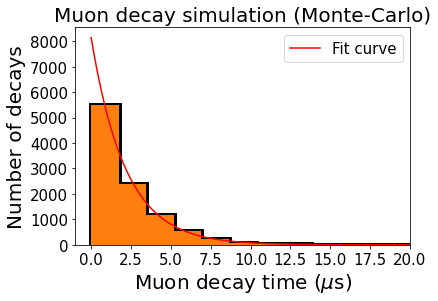

In [77]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants for muon decay
DECAY_RATE = 0.456 # Muon decay rate in inverse seconds
MAX_TIME = 0 # Maximum time to simulate
NUM_SIMULATIONS = 10000 # Number of simulations to run

# Function to simulate a single muon decay
def simulate_decay():
  time = 0
  while True:
    time += random.expovariate(DECAY_RATE)
    if time > MAX_TIME:
      break
  return time

# Run the simulations and store the results in a list
decay_times = []
for i in range(NUM_SIMULATIONS):
  decay_times.append(simulate_decay())

# Calculate the optimal bin width using the Sturges rule
bin_width = (max(decay_times) - min(decay_times)) / (1 + np.log2(len(decay_times)))

# Calculate the bin width using the Scott rule
#bin_width = 3.5 * np.std(decay_times) / len(decay_times) ** (1/3)

# Create an array of bin edges using the optimal bin width
bin_edges = np.arange(min(decay_times), max(decay_times) + bin_width, bin_width)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the results as a histogram
plt.figure()
plt.title('Muon decay simulation (Monte-Carlo)', fontsize=20)
plt.hist(decay_times, bins=bin_edges,  edgecolor='black', linewidth=5, linestyle='-')
plt.xlabel('Muon decay time ($\mu$s)', fontsize=20)
plt.ylabel('Number of decays', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1,20)

# Define the exponential decay function
def exponential_decay(t, rate, offset):
  return offset * np.exp(-rate * t)

# Fit the exponential decay function to the data
params, cov = curve_fit(exponential_decay, bin_centers, plt.hist(decay_times, bins=bin_edges)[0])

# Generate x values for the fit curve
x_fit = np.linspace(bin_edges[0], bin_centers[-1], 100)

# Calculate y values for the fit curve
y_fit = exponential_decay(x_fit, *params)

# Plot the fit curve
plt.plot(x_fit, y_fit, 'r', label='Fit curve')

# Print the fit equation
rate, offset = params

# uncertainties
unc1, unc2 = np.diag(np.sqrt(cov))


print(f'Fit equation: y = ({round(offset, -1)} ± {round(unc2, -1)})  * exp(-({rate:.3f} ± {unc1:.3f}) x)')

plt.legend(fontsize=15)
#plt.show()

print(len(bin_edges))
print(bins)

15
Fit equation: y = (8140.0 ± 70.0)  * exp(-(0.462 ± 0.005) x)


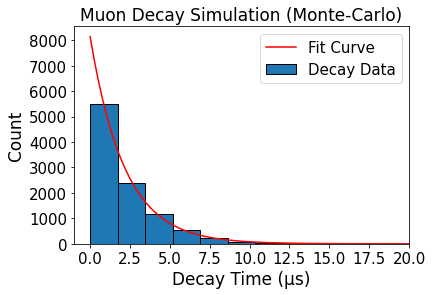

In [78]:
# Plot the results as a histogram
plt.figure()
plt.title('Muon Decay Simulation (Monte-Carlo)', fontsize=17)
plt.hist(decay_times, bins=bin_edges,  edgecolor='black', linestyle='-', label='Decay Data')

plt.plot(x_fit, y_fit, 'r', label='Fit Curve', color='red')
plt.xlabel('Decay Time (µs)', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1,20)
plt.legend(fontsize=15)

print(len(bin_centers))

print(f'Fit equation: y = ({round(offset, -1)} ± {round(unc2, -1)})  * exp(-({rate:.3f} ± {unc1:.3f}) x)')

Fit equation: y = (8140.0 ± 70.0)  * exp(-(0.462 ± 0.005) x)
[5484 2384 1159  556  229   89   47   28   11    8    5]


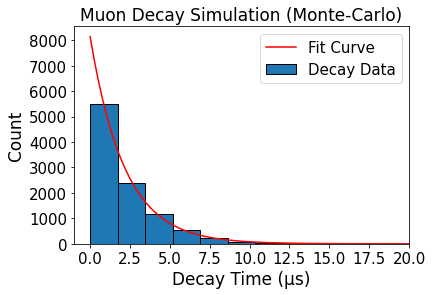

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the results as a histogram
plt.figure()
plt.title('Muon Decay Simulation (Monte-Carlo)', fontsize=17)

# Get the histogram data and bin edges
hist, edges = np.histogram(decay_times, bins=bin_edges)

# Merge bins with fewer than 5 counts with the previous bin
while min(hist) < 5:
    # Find the index of the bin with the minimum count
    min_index = np.argmin(hist)
    
    # Merge the current bin with the previous bin by summing the counts and combining the edges
    hist[min_index-1] += hist[min_index]
    edges[min_index] = edges[min_index-1]
    
    # Remove the current bin from the list of counts and edges
    hist = np.delete(hist, min_index)
    edges = np.delete(edges, min_index)

plt.hist(decay_times, bins=edges,  edgecolor='black', linestyle='-', label='Decay Data')
plt.plot(x_fit, y_fit, 'r', label='Fit Curve', color='red')
plt.xlabel('Decay Time (µs)', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1,20)
plt.legend(fontsize=15)

print(f'Fit equation: y = ({round(offset, -1)} ± {round(unc2, -1)})  * exp(-({rate:.3f} ± {unc1:.3f}) x)')

print(hist)


In [80]:
print(1/rate)
print(unc1)
print((1/rate**2) * unc1)

2.164263009884658
0.005161890795063916
0.024178473929005066


$$\dfrac{G_F}{\left(\hbar c\right)^3} = \sqrt{\dfrac{192\pi^3\hbar}{\left(m_\mu c^2\right)^5\tau}}$$

$$ \hbar = 6.582119569\times 10^{−16} \mathrm{\;eV\cdot s} $$
$$ m_\mu c^2 = 105.7 \mathrm{\;MeV} $$

The literature value (according to the National Institute of Standards and Technology) is:

$$ G_F/ (\hbar c)^3 = 1.1663787(6) \times 10^{-5} \mathrm{\;GeV}^{-2} $$

In [81]:
# Calculate Fermi

h_bar = 6.582119569*10**(-16)
#tau = 2.16 * 10**(-6)
#tau = 2.1358921339877623 * 10**(-6)
tau = 2.20389* 10**(-6)
m = 105.7
c = 3*10**8

In [82]:
GF = np.sqrt(((h_bar*192*np.pi**3) / (tau * ((m)**5))))
# Convert to GeV-2
GF = GF * 1000
print(GF)

1.1608494009900906e-05


In [83]:
print(f'Fermi Constant G_f  = {GF*1000:.10f} GeV ^-2')

Fermi Constant G_f  = 0.0116084940 GeV ^-2


In [84]:
GF1 = np.sqrt(((h_bar*192*np.pi**3) / ( ((m)**5)))) 

In [85]:
print(GF1)

1.7233394855322427e-11


In [86]:
uncertaintyGF = 1.7588 * 10**(-13)*1000

In [87]:
print(f'Fermi Constant G_f  = {GF*1000:.10f} +- {uncertaintyGF*1000:.10f} GeV ^-2')

Fermi Constant G_f  = 0.0116084940 +- 0.0000001759 GeV ^-2


In [88]:
# percentage difference
NIST = 1.1663787 * 10**(-5)

pd = ((NIST - GF) / NIST) * 100
print(f'{pd: .2f}%')

 0.47%


In [89]:
dtee = 4.74155*10**(-3)
Bee = np.sqrt((192*np.pi**3*h_bar)/(m*c**2)**5)

together = dtee*Bee
print(together)

3.3626750360598386e-56


In [90]:
tau_neg = 2.043
tau_pos = 2.197083 
rho = 1.25

tau_exp = (1+rho)*((tau_neg*tau_pos)/(tau_pos+rho*tau_neg))
print(tau_exp)

2.125825361626056


In [91]:
# mulan difference
mulan = 2.1969803*10**(-6)
FAST = 2.197083*10**(-6)
pd1 = (tau-mulan)/mulan * 100
pd2 = (tau-FAST)/FAST * 100


# sim difference
t_sim = 2.1930 *  10**(-6)
pd3 = (tau-t_sim)/t_sim *100
pdd = (2.128*10**(-6) - tau)/(2.128*10**(-6)) * 100


print(pd1, pd2, pd3, pdd)

0.314508964873301 0.3098198839097144 0.4965800273597769 -3.5662593984962263


In [92]:
print(1/0.47)

2.127659574468085


In [93]:
# uncertainty calc

dtau_neg = 0.003
dtau_pos = 0.0000028
tau_obs1 = tau_neg*tau_pos
#print(tau_obs1)
tau_obs2 = tau_pos + rho * tau_neg
#print(tau_obs2)

dtau_obs1 = tau_exp * np.sqrt((dtau_neg/tau_neg)**2 + (dtau_pos/tau_pos)**2)
#print(dtau_obs1)
dtau_obs2 = np.sqrt(dtau_pos**2 + (dtau_neg*rho)**2)
#print(dtau_obs2)
dtau_exp = tau_exp * np.sqrt((dtau_obs1/tau_obs1)**2 + (dtau_obs2/tau_obs2)**2) * (1+rho)

print(dtau_exp)

0.005031821732743531


In [94]:
### Try combining datasets see what we get
muonfinal_a = pd.read_table('finaldata2.data', delimiter=' ')
muonfinalaclean = cleandata(muonfinal_a)
muonfinalaclean

AttributeError: 'numpy.float64' object has no attribute 'read_table'

In [95]:
# next dataset
data2

,Muon Lifetime (μs),Time since beginning (μs)
27,0.46,1669050577
72,2.10,1669050621
111,8.28,1669050660
134,0.68,1669050682
164,1.06,1669050712
...,...,...
57523,0.28,1669108058
57546,1.74,1669108080
57609,1.20,1669108143
57634,2.38,1669108167


In [96]:
# combine the two...
finaldf = muonfinalaclean.append(data2)

NameError: name 'muonfinalaclean' is not defined

In [97]:
finaldf

NameError: name 'finaldf' is not defined

In [98]:
lowerlims, chisquareds2, rchisquareds2, doooof = best_cutoff(10, 24, finaldf)

NameError: name 'finaldf' is not defined

In [ ]:
no_of_bins, chi_squareds, rchi_squareds = best_binsizes(5, 25, finaldf)

In [99]:


# Calculate the optimal bin width using the Sturges rule
bin_width = (max(decay_times) - min(decay_times)) / (1 + np.log2(len(decay_times)))

# Calculate the bin width using the Scott rule
bin_width = 3.5 * np.std(decay_times) / len(decay_times) ** (1/3)

# Create an array of bin edges using the optimal bin width
bin_edges = np.arange(min(decay_times), max(decay_times) + bin_width, bin_width)

# Fit the exponential decay function to the data
params, cov = curve_fit(exponential_decay, bin_edges[:-1], plt.hist(finaldf['Muon Lifetime (μs)'], bins=bin_edges)[0])

# Generate x values for the fit curve
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 100)

# Calculate y values for the fit curve
y_fit = exponential_decay(x_fit, *params)

print()

# Plot the results as a histogram
plt.figure()
plt.title('Muon Decay Simulation (Monte-Carlo)', fontsize=17)
plt.hist(finaldf['Muon Lifetime (μs)'], bins=bin_edges,  edgecolor='black', linestyle='-', label='Decay Data')
plt.plot(x_fit, y_fit, 'r', label='Fit Curve', color='red')
plt.xlabel('Decay Time (µs)', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(-1,20)
plt.legend(fontsize=15)

print(f'Fit equation: y = ({round(offset, -1)} ± {round(unc2, -1)})  * exp(-({rate:.3f} ± {unc1:.3f}) x)')

NameError: name 'finaldf' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Create some sample data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 6, 7, 8]

# Plot the histogram
plt.hist(data, bins=8)

# Get the histogram data and bin edges
hist, edges = np.histogram(data, bins=8)

# Merge bins with fewer than 5 counts with the previous bin
while min(hist) < 5:
    # Find the index of the bin with the minimum count
    min_index = np.argmin(hist)
    
    # Merge the current bin with the previous bin by summing the counts and combining the edges
    hist[min_index-1] += hist[min_index]
    edges[min_index] = edges[min_index-1]
    
    # Remove the current bin from the list of counts and edges
    hist = np.delete(hist, min_index)
    edges = np.delete(edges, min_index)

# Plot the modified histogram
plt.hist(data, bins=edges)
plt.show()
